In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# X,y=make_blobs?

In [3]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=0)

In [4]:
X

array([[ 2.69858199e+00, -6.72959749e-01],
       [-1.28113261e-01,  4.35595241e+00],
       [ 2.50904929e+00,  5.77314610e+00],
       [-1.51827611e+00,  3.44488647e+00],
       [-7.22828865e-02,  2.88376939e+00],
       [ 9.15847989e+00, -2.02241838e+00],
       [ 2.81702219e-01,  4.15415279e+00],
       [ 8.86731348e+00, -1.60680112e+00],
       [ 1.69057398e+00,  1.05436752e+00],
       [ 1.57561171e+00,  1.51802196e+00],
       [-2.93648580e+00,  7.72299403e+00],
       [-2.54494589e+00,  2.84002751e+00],
       [ 3.41947985e-01,  3.94104616e+00],
       [-1.95317713e+00,  8.51543486e+00],
       [-1.06948841e+00,  1.95327025e+00],
       [ 8.52356487e+00, -2.29836088e+00],
       [-3.45525412e-01,  2.28597850e+00],
       [ 9.32420949e+00, -4.12539889e+00],
       [ 2.31515256e-01,  3.47734879e+00],
       [-2.85911567e+00,  9.49257572e-01],
       [ 1.76343016e+00,  1.36171448e-01],
       [ 1.02096538e+01, -2.85681022e+00],
       [-4.48706710e-01,  3.58697595e-01],
       [-3.

In [5]:
X.shape

(500, 2)

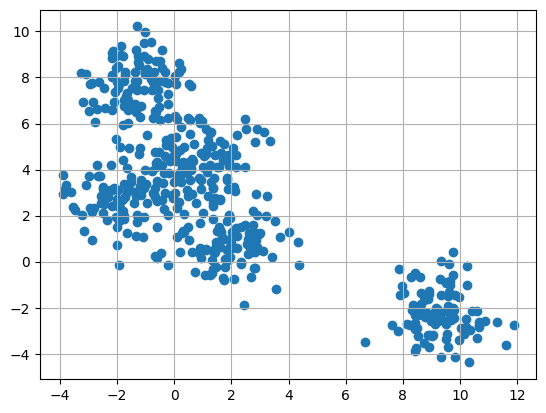

In [6]:
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [7]:
k=4

color=["orange","green","blue","yellow","red"]

clusters={}

In [8]:
for i in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]

    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i]=cluster
    

In [9]:
clusters

{0: {'center': array([-0.93325536, -1.41004218]),
  'points': [],
  'color': 'orange'},
 1: {'center': array([3.41734888, 0.4939684 ]),
  'points': [],
  'color': 'green'},
 2: {'center': array([ 4.30799582, -0.52673991]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 8.04071213, -5.68367743]),
  'points': [],
  'color': 'yellow'}}

In [10]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [11]:
def assign_points_to_cluster(clusters,X):
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        

In [12]:
def update_position_of_Cluster(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])

        if pts.shape[0]>0:
            new_center=pts.mean(axis=0)
            clusters[kx]['center']=new_center
            clusters[kx]['points']=[]



In [13]:
def plot_points(clusters):
    for kx in range(k):
        #to plot the points in the cluster
        pts=np.array(clusters[kx]['points'])

        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        #this is to plot the centers in the scatter plot

        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')

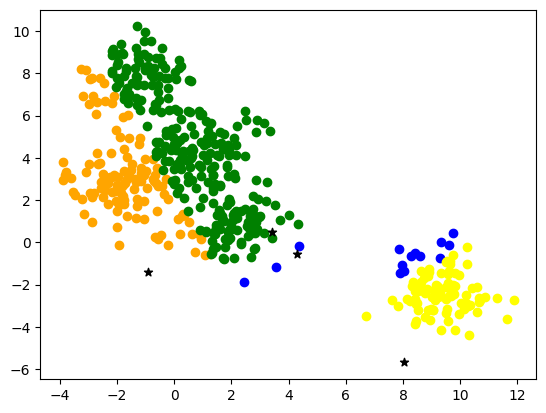

In [14]:
assign_points_to_cluster(clusters,X)
plot_points(clusters)

In [15]:
update_position_of_Cluster(clusters)

In [16]:
for i in range(100):
    update_position_of_Cluster(clusters)
    assign_points_to_cluster(clusters,X)

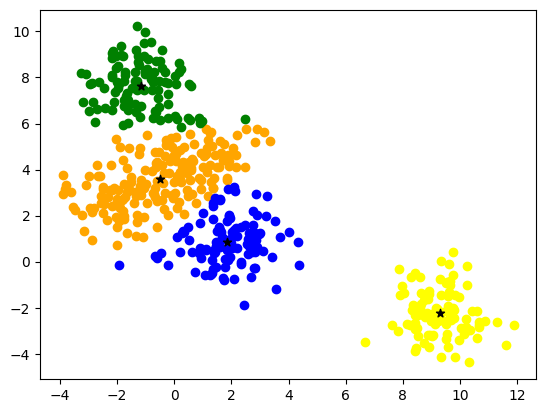

In [17]:
plot_points(clusters)